<a href="https://colab.research.google.com/github/mks2607/Data_Scientist/blob/mks2607/Gym_Check_ins_and_User_Metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df_checkin = pd.read_csv('/content/checkin_checkout_history_updated.csv')
df_gym = pd.read_csv('/content/gym_locations_data.csv')
df_sub = pd.read_csv('/content/subscription_plans.csv')
df_user = pd.read_csv('/content/users_data.csv')

In [31]:
df_checkin

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049
...,...,...,...,...,...,...
299995,user_3995,gym_3,2023-08-06 17:25:00,2023-08-06 18:09:00,Pilates,288
299996,user_206,gym_9,2023-06-27 13:14:00,2023-06-27 16:04:00,Weightlifting,1935
299997,user_4983,gym_4,2023-04-08 14:41:00,2023-04-08 15:54:00,Cardio,1312
299998,user_1028,gym_10,2023-03-05 06:07:00,2023-03-05 07:04:00,Cardio,787


In [10]:
df_gym.head(3)

,gym_id,location,gym_type,facilities
0,gym_1,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
1,gym_2,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,gym_3,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"


In [11]:
df_sub.head(3)

,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


In [13]:
df_user.head(3)

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic
1,user_2,Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro
2,user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic


In [16]:
df_checkin['gym_id'].unique()

array(['gym_6', 'gym_2', 'gym_7', 'gym_10', 'gym_5', 'gym_8', 'gym_1',
       'gym_3', 'gym_4', 'gym_9'], dtype=object)

In [17]:
df_gym['gym_id'].unique()

array(['gym_1', 'gym_2', 'gym_3', 'gym_4', 'gym_5', 'gym_6', 'gym_7',
       'gym_8', 'gym_9', 'gym_10'], dtype=object)

In [19]:
df_sub['subscription_plan'].unique()

array(['Basic', 'Pro', 'Student'], dtype=object)

In [21]:
df_user['subscription_plan'].unique()

array(['Basic', 'Pro', 'Student'], dtype=object)

In [25]:
df_checkin['user_id'].unique()

array(['user_3291', 'user_1944', 'user_958', ..., 'user_4879',
       'user_4233', 'user_3522'], dtype=object)

In [22]:
df_user['user_id'].unique()

array(['user_1', 'user_2', 'user_3', ..., 'user_4998', 'user_4999',
       'user_5000'], dtype=object)

In [32]:
df_2 = pd.merge(df_sub,df_user, on = 'subscription_plan',how='inner')

df_2

,subscription_plan,price_per_month,features,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location
0,Basic,19.99,"Access to basic gym facilities, Limited class ...",user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver
1,Basic,19.99,"Access to basic gym facilities, Limited class ...",user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando
2,Basic,19.99,"Access to basic gym facilities, Limited class ...",user_5,Chris,Jones,25,Female,2004-08-25,2021-01-08,Denver
3,Basic,19.99,"Access to basic gym facilities, Limited class ...",user_10,John,Jones,28,Non-binary,2005-10-30,2022-06-24,Detroit
4,Basic,19.99,"Access to basic gym facilities, Limited class ...",user_23,Sarah,Williams,19,Female,1967-02-06,2023-01-27,Austin
...,...,...,...,...,...,...,...,...,...,...,...
4995,Student,9.99,"Access to basic facilities, Limited class acce...",user_4990,John,Johnson,53,Male,1965-08-29,2021-02-01,Detroit
4996,Student,9.99,"Access to basic facilities, Limited class acce...",user_4991,David,Williams,49,Female,1960-03-29,2021-04-03,Denver
4997,Student,9.99,"Access to basic facilities, Limited class acce...",user_4995,Michael,Moore,20,Male,1991-01-17,2023-06-21,Orlando
4998,Student,9.99,"Access to basic facilities, Limited class acce...",user_4997,Linda,Brown,22,Male,1974-02-20,2023-01-22,Austin


In [28]:
df_1 = pd.merge(df_checkin,df_gym, on='gym_id', how='inner')

df_1 # его дальше соединим с df_2

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna"
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool"
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049,San Jose,Premium,"Swimming Pool, Sauna, CrossFit"
...,...,...,...,...,...,...,...,...,...
299995,user_3995,gym_3,2023-08-06 17:25:00,2023-08-06 18:09:00,Pilates,288,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"
299996,user_206,gym_9,2023-06-27 13:14:00,2023-06-27 16:04:00,Weightlifting,1935,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
299997,user_4983,gym_4,2023-04-08 14:41:00,2023-04-08 15:54:00,Cardio,1312,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
299998,user_1028,gym_10,2023-03-05 06:07:00,2023-03-05 07:04:00,Cardio,787,San Jose,Premium,"Swimming Pool, Sauna, CrossFit"


In [35]:
df_merge = pd.merge(df_1,df_2, on='user_id', how='inner')

df_merge.head(3)

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,subscription_plan,price_per_month,features,first_name,last_name,age,gender,birthdate,sign_up_date,user_location
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",Pro,49.99,"Access to all facilities, Unlimited class acce...",Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna",Pro,49.99,"Access to all facilities, Unlimited class acce...",Michael,Garcia,24,Female,1985-11-28,2023-07-16,Las Vegas
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool",Basic,19.99,"Access to basic gym facilities, Limited class ...",Emily,Rodriguez,37,Male,1986-03-12,2021-09-15,Boston


In [41]:
df_merge.groupby('gym_id').count()

,user_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,subscription_plan,price_per_month,features,first_name,last_name,age,gender,birthdate,sign_up_date,user_location
gym_id,,,,,,,,,,,,,,,,,,
gym_1,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952,29952
gym_10,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925,29925
gym_2,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895,29895
gym_3,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286
gym_4,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182,30182
gym_5,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104,30104
gym_6,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893,29893
gym_7,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954,29954
gym_8,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935,29935


In [50]:
df_merge.groupby('user_id')['calories_burned'].sum().reset_index()

,user_id,calories_burned
0,user_1,60151
1,user_10,50562
2,user_100,48913
3,user_1000,36706
4,user_1001,54324
...,...,...
4995,user_995,44766
4996,user_996,46483
4997,user_997,42674
4998,user_998,42114


In [51]:
df_merge.groupby('user_id')['calories_burned'].sum()

,calories_burned
user_id,
user_1,60151
user_10,50562
user_100,48913
user_1000,36706
user_1001,54324
...,...
user_995,44766
user_996,46483
user_997,42674


In [54]:
df_merge.groupby('user_id')['calories_burned'].min()

,calories_burned
user_id,
user_1,188
user_10,255
user_100,201
user_1000,258
user_1001,256
...,...
user_995,164
user_996,212
user_997,182


In [59]:
user_calories = df_merge.groupby('user_id')['calories_burned'].agg(['sum','min','max','count']).reset_index()

In [60]:
user_calories

,user_id,sum,min,max,count
0,user_1,60151,188,1868,65
1,user_10,50562,255,1862,51
2,user_100,48913,201,1841,55
3,user_1000,36706,258,1941,44
4,user_1001,54324,256,2084,54
...,...,...,...,...,...
4995,user_995,44766,164,2038,48
4996,user_996,46483,212,1675,56
4997,user_997,42674,182,1808,51
4998,user_998,42114,280,1695,51


In [65]:
top_100 = user_calories.nlargest(100,'sum')

top_100

,user_id,sum,min,max,count
4696,user_725,83337,204,2032,87
4315,user_4883,82164,168,1891,89
4021,user_4618,81282,264,1985,88
2261,user_3033,79551,227,1837,85
4698,user_727,79114,245,1964,86
...,...,...,...,...,...
254,user_1227,70105,212,2035,76
1409,user_2267,70033,225,1871,73
4039,user_4634,70004,245,1854,74
4542,user_587,69974,194,1912,83


from matplotlib import pyplot as plt
top_100['sum'].plot(kind='hist', bins=20, title='sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_100['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_100['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_100['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_100.plot(kind='scatter', x='sum', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_100.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_100.plot(kind='scatter', x='max', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_100['sum'].plot(kind='line', figsize=(8, 4), title='sum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_100['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_100['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_100['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

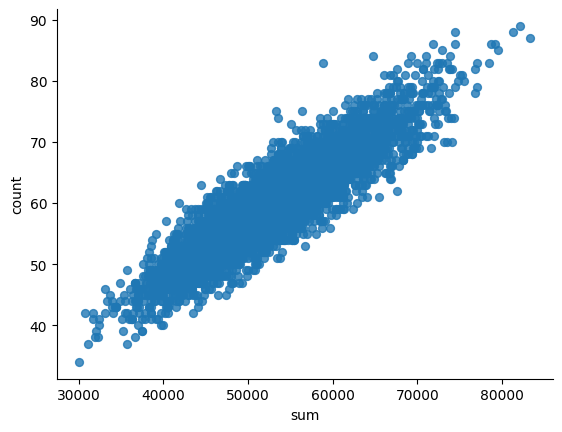

In [70]:
from matplotlib import pyplot as plt
user_calories.plot(kind='scatter', x='sum', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

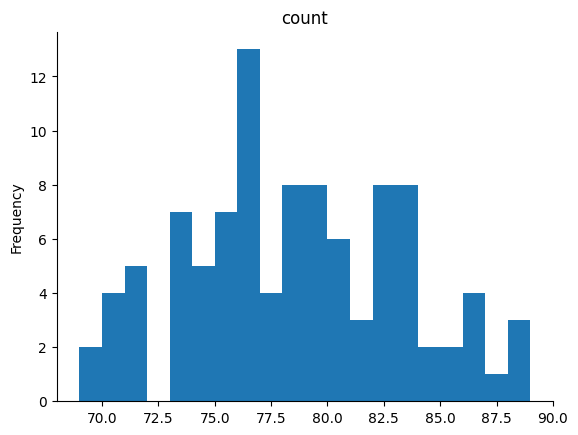

In [66]:
from matplotlib import pyplot as plt
top_100['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)